# End-to-End Business Analytics Project

## 1 Problem Description

You are supposed to build a model that can predict the median housing price in some district in California.<br>
This information can be used to determine whether it is worth investing in a given property in some given area or not.



## 2 Getting Data

For this project we will use the California housing prices data set from the StatLib repository. The dataset contains metrics like population, number of rooms, ocean proximity, median income, median housing prices, etc. for block groups in California. Block groups are the smallest geographical units for which the US Census Bureau publishes sample data.
The dataset is already downloaded as “housing.csv”. In a first step we will import this dataset as a Pandas dataframe.

In [3]:
import pandas as pd

In [4]:
df_housing = pd.read_csv("housing.csv")

Let us have a closer look at the dataset by using the `df.head()` and the `df.tail()` methods.

In [5]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


The `info()` method is useful to get a quick description of the data in particularly the total number of rows each attributes type and the number of non null values. You may also want to try the `len()` and `df.shape`

In [7]:
df_housing.info()  # Do not forget the paratheses 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We notice that the variable "total_bedrooms" has some missing values. We will later delete the corresponding rows or columns.

In [8]:
# The number of obsercations (rows)
len(df_housing)

20640

In [9]:
# The number of rows (observations) and columns (variables) 
df_housing.shape

(20640, 10)

In [10]:
# Let us look at the type of a specific observation and variable
type(df_housing['ocean_proximity'][1])   # Remember quotes on the variable names

str

In [11]:
# Find out how many categories exist and how many districts
# belong to each of these categories by applying the `value_counts()` method.

df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## 3 Visualize the data to gain insights

### Histogram

Let us draw a histogramm for each of the variables.

In [12]:
%matplotlib inline

# You may not need this. However, use it if the graphs do not show up.

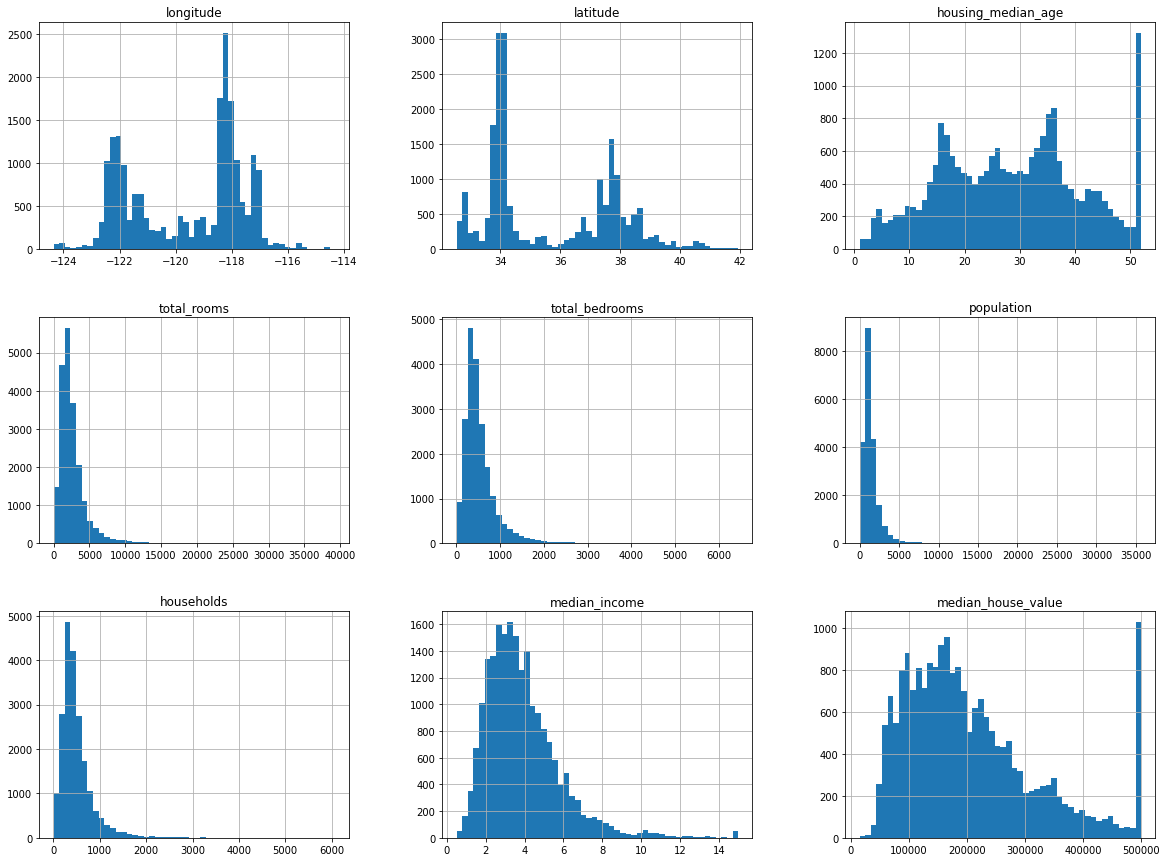

In [13]:
import matplotlib.pyplot as plt
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

# Note that calling show() is optional in Jupiter notebook as
# Jupiter will automatically display plots when a cell is executed


We observe that all the distributions are rather non-symmetric. The median house value seems to be cut of at 500,000
Also the median housing age seems to have an upper bound in the set.

In [14]:
print('The max house value is: ', max(df_housing.median_house_value))
print('The max age value is: ', max(df_housing.housing_median_age))

N_max_value=df_housing['median_house_value'][df_housing['median_house_value']==500001].count()

print("There are ", N_max_value, "houses with max value")

The max house value is:  500001.0
The max age value is:  52.0
There are  965 houses with max value


### Geographical plot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

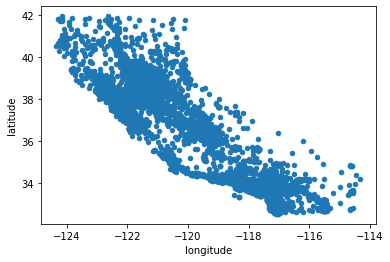

In [15]:
df_housing.plot(kind="scatter", x="longitude", y="latitude") 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

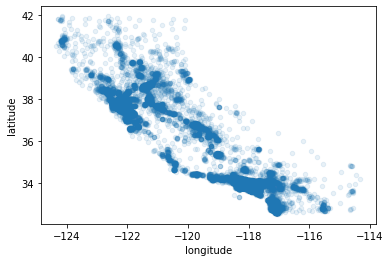

In [16]:
df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

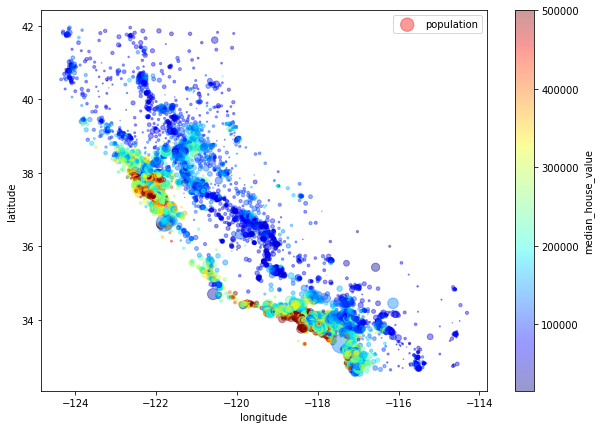

In [17]:
df_housing.plot(kind = "scatter", 
                x = "longitude", 
                y = "latitude", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_housing["population"]/100,   # The marker size according to population
                label = "population",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                c = "median_house_value",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)                     #  each subplot x- or y-axis will be independent  

plt.legend()


# Try to put an error into cmap then you get a suggestion of all the possibilities


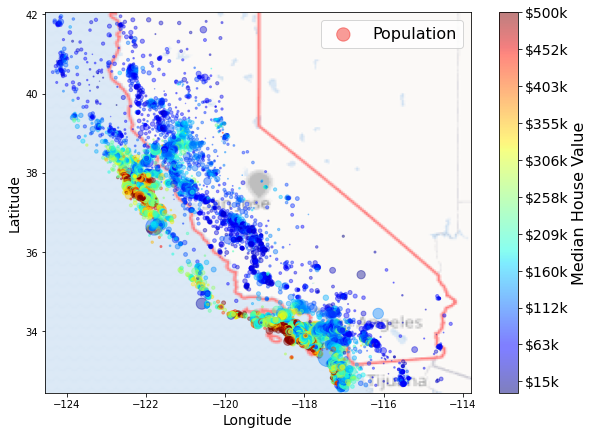

In [18]:
import matplotlib.image as mpimg
import numpy as np

california_img=mpimg.imread('california.png')

ax = df_housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=df_housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df_housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

plt.show()

### Looking at Correlations

In [17]:
# This creates a correlation matrix
corr_matrix = df_housing.corr()

# print(corr_matrix)

In [18]:
# We are only interested in the correlations of 'median_house_value'

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**Conclusion**: Medain house value is highly correlated with income.

---

A nice way to view the correlation between attributes is to use Pandas’ `scatter_matrix`
function, which plots every numerical attribute against every other numerical attribute. 
Since there are 11 numerical attributes, we would get 11 x 11 = 121 plots; You may therefore select the attributes which are essential:

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

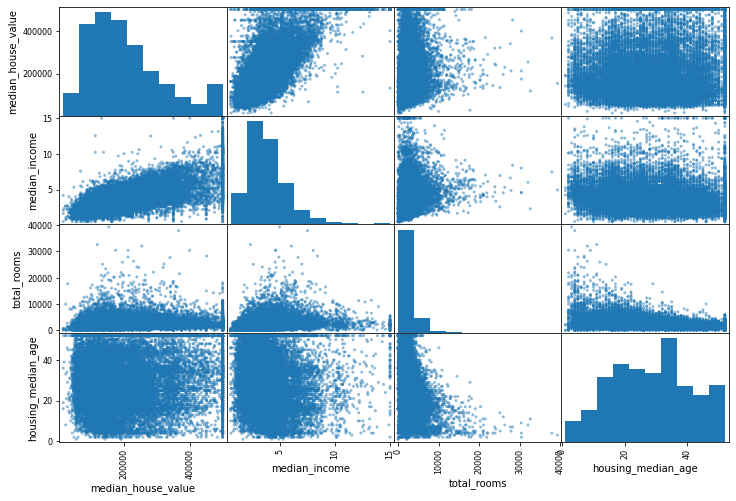

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(df_housing[attributes], figsize=(12, 8))

**Note!** The main diagonal (top left to bottom right) would be full of straight lines if Pandas
plotted each variable against itself, which is not be very useful. So instead Pandas
displays a histogram of each attribute.


The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot

(0.0, 16.0, 0.0, 550000.0)

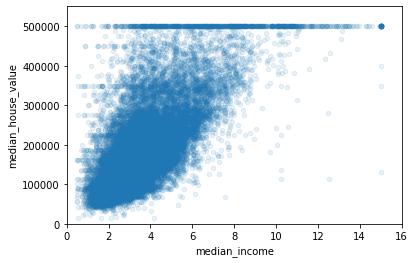

In [20]:
df_housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at 500,000 USD.

But this plot reveals other less obvious straight lines: a horizontal line around USD 450,000,
another around 350,000 USD, perhaps one around USD 280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

In [21]:
df_housing["rooms_per_household"] = df_housing["total_rooms"]/df_housing["households"]
df_housing["bedrooms_per_room"] = df_housing["total_bedrooms"]/df_housing["total_rooms"]
df_housing["population_per_household"] = df_housing["population"]/df_housing["households"]

Before applying Machine Learning algorithms, it can be useful to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the **number of rooms per household**. Similarly, the total number of **bedrooms** by itself is not very useful: you probably want to **compare it to the number of rooms**. And the **population per household** also seems like an interesting attribute combination to look at. Here we will create these: 

Again you may want to make some plots for the new variables.

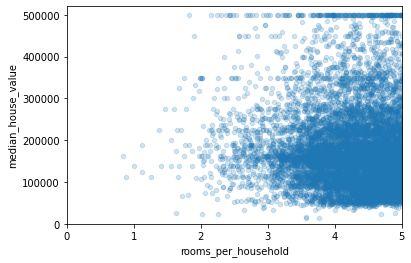

In [22]:
df_housing.plot(kind="scatter", 
                x="rooms_per_household", 
                y="median_house_value",
                alpha=0.2)

plt.axis([0, 5, 0, 520000])   # Here x from 0 to 5 and y from 0 to 520000
plt.show()

## 4 Basic Statistics

In [23]:
# A statistical summary

df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [24]:
# Again, the corrlations

corr_matrix = df_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

You should comment on the observations you make. Maybe you can confirm a hypothesis or you can observe some surprising and counterintuitive observations.

## 5 Prepare data


### Remove or replace missing values
In what follows we will remove all the rows where the variable has missing values. <br>
We remove the rows because we do not have a plausible value that we can insert. <br>
Furthermore, there are not many missing values so we are confident that this will not screw our analysis. <br>
However, if we run regression without this variable, we would not need to remove these rows. <br>

Let us first check where the NaN's are.

In [25]:
df_housing[df_housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,4.633540,NaN,2.403727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,4.646983,NaN,4.070603
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,3.140420,NaN,2.543307
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,NaN,2.542601
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,6.771499,NaN,3.358722


In [26]:
# We will first test without inplace = True. The resulting number of rows appears below the table
df_housing.dropna(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [27]:
# Now we will indeed remove the rows
df_housing.dropna(axis=0, inplace = True)
len(df_housing)


# NOTE NOTE NOTE
# As can be seen from the table above the indexes still go to 20639, while there are 20433 rows
# This means some indexes have been removed. This can cause a problem later (for example in the
# stratified splitting, we will therefor reindex the the new dataframe
# This has cost me 1 hour to figure out :-(

df_housing.reset_index(inplace=True)
df_housing.tail(2)


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20431,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209
20432,20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,5.254717,0.221185,2.616981


### Handling Categorical Variables

As we see the variable 'ocean_proximity' has five different text values. We will replace this categorical variable with dummy variables.

In [28]:
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
df_housing = pd.get_dummies(df_housing, drop_first=True) #Kick out one of the dummies (drop_first=True)

We need to apply `drop_first=True` if there is an intercept in the regression model because we would create perfect multicolinearity between the variables

For example, for a variable with three categories:


<table style='float:left;'>
    <tr>
        <th>d1</th>
        <th>d2</th>
        <th>d3</th>
        <th>const</th>
    </tr>
    <tr>
        <th>1</th>
        <th>0</th>
        <th>0</th>
        <th>1</th>
    </tr>    
    <tr>
        <th>0</th>
        <th>1</th>
        <th>0</th>
        <th>1</th>
    </tr>    
    <tr>
        <th>0</th>
        <th>0</th>
        <th>1</th>
        <th>1</th>
    </tr>    
</table>
<p>    


We see here that
d1 = const - d2 - d3
A perfect linear relationship.
In such a case we can not find unique regression parameters.


In [30]:
df_housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,1,0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,1,0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,1,0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,1,0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,1,0


### Splitting the Data into Training and Test Set

In the following, we will partition the whole set into a training and into a test set.<br>
Here we will apply **random sampling** since the dataset is pretty large (and for simplicity). You may consider **stratisfied sampling**. We will here look how it works for our dataset, but we won't use it.

#### Random Sampling

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)

In [32]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17560,17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,4.951740,0.209429,3.028058,0,0,0,0
2045,2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,5.954023,0.174710,3.563218,1,0,0,0
6383,6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,5.126482,0.217939,2.434783,1,0,0,0
4574,4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,2.642058,0.401778,3.086130,0,0,0,0
15118,15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,4.551980,0.213159,3.222772,0,0,0,1


#### Stratified Sampling

In [33]:
df_housing['income_cat'] =  pd.cut(df_housing['median_income'],
                                  bins=[0.0, 1.5, 3.0, 4.5, 6, float('inf')],
                                  labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

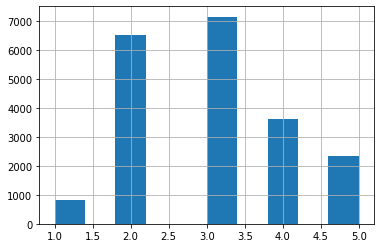

In [34]:
df_housing['income_cat'].hist()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss.get_n_splits(df_housing, df_housing['income_cat'])


1

In [36]:
# The following is just for seeing how it works

for train_index, test_index in sss.split(df_housing, df_housing['income_cat']):
    print(train_index)
    print(test_index)

# Note that there is only one iteration, since there is only one split (we could have split
# into several training and test sets)
 
print(len(train_index))
print(len(test_index))
    
    

[17880 17389 19010 ...  7272 11763  9789]
[17971  8014  8226 ...  3867 12595  3677]
16346
4087


In [37]:
# Note that several splits would require a loop through the splits to create all the traing and test sets.
# See a separate file for this.

strat_train_set = df_housing.loc[train_index]
strat_test_set = df_housing.loc[test_index]


Let us now check how the income category is distributed in the test and training set.

In [38]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: income_cat, dtype: float64

In [39]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: income_cat, dtype: float64

We continue with the random sampling.

### 6 Select and Train a Model

In what follows, we want to apply a linear regression model.


In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [41]:
train_X = train_set.drop(['median_house_value'], axis=1)
train_y = train_set['median_house_value']

test_X = test_set.drop(['median_house_value'], axis=1)
test_y = test_set['median_house_value']


In [42]:
model = model.fit(train_X, train_y)

In [43]:
pred_y = model.predict(train_X)

In [44]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(train_y, pred_y)
RMSE = np.sqrt(MSE)

print(RMSE)

67474.13908126765


In [45]:
pred_y = model.predict(test_X)

MSE = mean_squared_error(test_y, pred_y)
RMSE = np.sqrt(MSE)

print(RMSE) # Note that this one is always less if you add more variables



68805.1764706805


Notice that his RMSE is not deterministic. It will most probably change when you rerun the code, because then another training sample is generated.  
Anyway, this is clearly not a great score: most districts have a median_housing_values between USD 120,000 and USD 265,000, so a typical prediction error of around USD 65,000 is not very satisfying.

Hence, we would try to look for a better model. What can we do? There are several possibilities.
1. Add more variables
2. Reduce the number to the important variables
3. Try another model

Let us try another model, namely Decision Tree Regression (just for fun here, you will learn how this works later).


In [46]:
# Import the library
from sklearn.tree import DecisionTreeRegressor

# Define the model
model_02 = DecisionTreeRegressor()

# Fit the model
model_02.fit(train_X, train_y)

# Predict with the model
pred_y = model_02.predict(train_X)

# Calculate the MSE
MSE = mean_squared_error(train_y, pred_y)
RMSE = np.sqrt(MSE)

print(RMSE)

0.0


No error at all?<br>
Can this model really be absolutely perfect?<br>
No. It is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training,
and part for model validation. One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate it against the validation set. 

### 7 Forward Selection to reduce the number of variables

**Step 0:** Let us look again at the correlations

In [47]:
corr_matrix = train_set.corr()
C = abs(corr_matrix['median_house_value'])
C.sort_values()

population_per_household      0.021640
population                    0.023989
ocean_proximity_ISLAND        0.027272
longitude                     0.048166
total_bedrooms                0.051352
households                    0.066598
index                         0.071034
housing_median_age            0.104041
ocean_proximity_NEAR OCEAN    0.135367
total_rooms                   0.136040
latitude                      0.141933
ocean_proximity_NEAR BAY      0.158891
rooms_per_household           0.161596
bedrooms_per_room             0.253955
ocean_proximity_INLAND        0.482445
median_income                 0.688695
median_house_value            1.000000
Name: median_house_value, dtype: float64

---

Let us look at the model with only 'median_income'. <br>
Let us caclulate the criterion that we want to use to evaluate our model. <br>
Here we apply adjusted R^2. 

In [48]:
model = model.fit(train_X[['median_income']], train_y)

N = len(train_X)
P = 1    

R2 = model.score(train_X[['median_income']], train_y)
R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

print(R2_adj)


0.47426849899580226


In [49]:
# Let us define a list with column names
col_names = train_X.columns
col_names = col_names.tolist()
print(col_names)




['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [50]:
# Remove the variable that we already have
col_names.remove('median_income')

In [51]:

Results = pd.DataFrame({'Variable':[], 'R2_adj':[]})

for col in col_names:
    
    variables = ['median_income',col]
    P = len(variables)
    
    
    model = model.fit(train_X[variables], train_y)
    pred_y = model.predict(train_X[variables])
    
    R2 = model.score(train_X[variables], train_y)
    R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

    
    Results.loc[Results.shape[0]] = [col, R2_adj]
        
    print(variables, R2_adj)   # You can leave this away when you know that it works
    
    
print(Results[Results['R2_adj']==Results['R2_adj'].max()])

['median_income', 'index'] 0.47465384187563453
['median_income', 'longitude'] 0.4753309631525181
['median_income', 'latitude'] 0.4826567647700708
['median_income', 'housing_median_age'] 0.5097494564764202
['median_income', 'total_rooms'] 0.47424678850814883
['median_income', 'total_bedrooms'] 0.4772669236270579
['median_income', 'population'] 0.4750753937055311
['median_income', 'households'] 0.4772802053322527
['median_income', 'rooms_per_household'] 0.4799239894756664
['median_income', 'bedrooms_per_room'] 0.5203437341290822
['median_income', 'population_per_household'] 0.4756241651542058
['median_income', 'ocean_proximity_INLAND'] 0.5834326550380009
['median_income', 'ocean_proximity_ISLAND'] 0.4753681500163266
['median_income', 'ocean_proximity_NEAR BAY'] 0.48757044886046363
['median_income', 'ocean_proximity_NEAR OCEAN'] 0.4885411540868083
                  Variable    R2_adj
11  ocean_proximity_INLAND  0.583433


We can increase the adjsuted R^2 by adding 'ocean_proximity_INLAND'.<br>
(You may actually run the whole script several times to see whether different models would be selected. Note that the traing set is randomly chosen)


In [52]:
# Remove the variable that we already have
col_names.remove('ocean_proximity_INLAND')

In [53]:
# Same loop as above, but with 'ocean_proximity_INLAND'


Results = pd.DataFrame({'Variable':[], 'R2_adj':[]})

for col in col_names:
    
    variables = ['median_income','ocean_proximity_INLAND',col]
    P = len(variables)
    
    
    model = model.fit(train_X[variables], train_y)
    pred_y = model.predict(train_X[variables])
    
    R2 = model.score(train_X[variables], train_y)
    R2_adj = 1-(N-1)/(N-P-1)*(1-R2)

    
    Results.loc[Results.shape[0]] = [col, R2_adj]
        
    print(variables, R2_adj)   # You can leave this away when you know that it works
    
    
print(Results[Results['R2_adj']==Results['R2_adj'].max()])




['median_income', 'ocean_proximity_INLAND', 'index'] 0.5852312324799824
['median_income', 'ocean_proximity_INLAND', 'longitude'] 0.5861186082323936
['median_income', 'ocean_proximity_INLAND', 'latitude'] 0.5838937185752502
['median_income', 'ocean_proximity_INLAND', 'housing_median_age'] 0.5938152806293963
['median_income', 'ocean_proximity_INLAND', 'total_rooms'] 0.583884188665044
['median_income', 'ocean_proximity_INLAND', 'total_bedrooms'] 0.5860520936092464
['median_income', 'ocean_proximity_INLAND', 'population'] 0.5847034687431218
['median_income', 'ocean_proximity_INLAND', 'households'] 0.5851942678039436
['median_income', 'ocean_proximity_INLAND', 'rooms_per_household'] 0.5834991941659184
['median_income', 'ocean_proximity_INLAND', 'bedrooms_per_room'] 0.5953722113756696
['median_income', 'ocean_proximity_INLAND', 'population_per_household'] 0.5843005472845593
['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND'] 0.5842942480517341
['median_income', 'ocean_proxi

We would continue like this, until adjusted R^2 will not increase.

Let us for know assume that we have found the right model to be the following:


In [54]:
best_train_X = train_X[['latitude', 
                       'ocean_proximity_NEAR BAY',
                       'rooms_per_household', 
                       'bedrooms_per_room', 
                       'ocean_proximity_INLAND', 
                       'median_income']]

In [55]:
# Let us make sure that we run the right model
model = model.fit(best_train_X, train_y)

# Prediction
pred_y = model.predict(best_train_X)

# Score
MSE = mean_squared_error(train_y, pred_y)
RMSE = np.sqrt(MSE)

print(RMSE) # Note that this one is always less if you add more variables to the training model


72857.59002964004


Obviously our model is not very good. We need to learn some other prediction models that might work better.

Nevertheless, when we have found a good model, we will check the performance with the test set.


### Evaluate Your System on the Test Set

In [56]:
best_test_X = test_X[['latitude', 
                      'ocean_proximity_NEAR BAY',
                      'rooms_per_household', 
                      'bedrooms_per_room', 
                      'ocean_proximity_INLAND', 
                      'median_income']]

In [57]:
# Let us predict pn the unseen data
pred_y = model.predict(best_test_X)


In [58]:
# Let us check the error

MSE = mean_squared_error(test_y, pred_y)
RMSE = np.sqrt(MSE)

print(RMSE) 


74486.55557910883


## Final Commments:

We went through the following steps:
1. Data import
1. Data description and visualization
1. Data cleaning
1. Basic statistics
1. Splitting training and test set
1. Selecting potential model type, building particular models and training
1. Evaluating perfomance of potential models
1. Choosing the model that comes out best
1. Testing the model on the test set 

As we saw, predicting is not necessarily an easy task. Our prediction model was not that good.
Other potential models are neural networks, decision tree regression, etc.



# The End